In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load Data
amazon_df = pd.read_csv('amazon_reviews.csv')
amazon_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
amazon_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
amazon_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [ ]:
#Dropping date column
amazon_df = amazon_df.drop(['date'], axis = 1)
amazon_df

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1
...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
###Data Exploration

<AxesSubplot:>

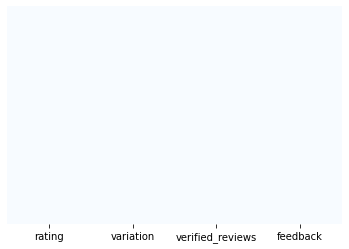

In [ ]:
sns.heatmap(amazon_df.isnull(), cbar = False, yticklabels = False, cmap = 'Blues')

<AxesSubplot:xlabel='rating', ylabel='count'>

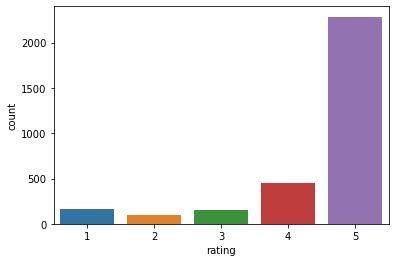

In [ ]:
sns.countplot(data = amazon_df, x = 'rating')

<AxesSubplot:xlabel='feedback', ylabel='count'>

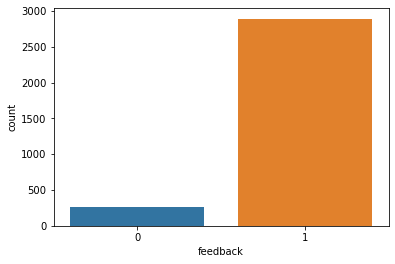

In [ ]:
sns.countplot(data = amazon_df, x = 'feedback')

In [ ]:
amazon_df['review_length'] = amazon_df['verified_reviews'].apply(len)
amazon_df

,rating,variation,verified_reviews,feedback,review_length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


In [ ]:
amazon_df['review_length'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: review_length, dtype: float64

In [ ]:
#Message having avg length
amazon_df[amazon_df['review_length'] == 132]['verified_reviews']


570     Nice. It works good.Some times is not easy to ...
1655    awesome product! I am in the process of having...
1705    If you belong to amazon prime, I would think t...
2321    I expected to have access to more current movi...
2483    Works good for the most part. You ask it some ...
2834    Works good for the most part. You ask it some ...
Name: verified_reviews, dtype: object

In [ ]:
amazon_df[amazon_df['review_length'] == 132]['verified_reviews'].count()

6

<AxesSubplot:ylabel='Frequency'>

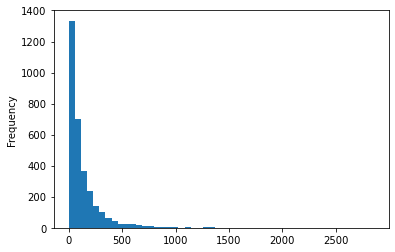

In [ ]:
amazon_df['review_length'].plot(bins = 50, kind = 'hist')

# TASK #4: PLOT THE WORDCLOUD

In [ ]:
negative = amazon_df[amazon_df['feedback'] == 0]
negative

,rating,variation,verified_reviews,feedback,review_length
46,2,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,Charcoal Fabric,Not much features.,0,18
162,1,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...
3047,1,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,Black Dot,The only negative we have on this product is t...,0,240
3091,1,Black Dot,I didn’t order it,0,17


In [ ]:
negative.describe()

,rating,feedback,review_length
count,257.000000,257.0,257.000000
mean,1.373541,0.0,215.241245
std,0.484688,0.0,236.325955
min,1.000000,0.0,1.000000
25%,1.000000,0.0,53.000000
50%,1.000000,0.0,137.000000
75%,2.000000,0.0,289.000000
max,2.000000,0.0,1686.000000


In [ ]:
positive = amazon_df[amazon_df['feedback'] == 1]
positive

,rating,variation,verified_reviews,feedback,review_length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


In [ ]:
positive.describe()

,rating,feedback,review_length
count,2893.000000,2893.0,2893.000000
mean,4.737643,1.0,124.659177
std,0.546544,0.0,174.624491
min,3.000000,1.0,1.000000
25%,5.000000,1.0,29.000000
50%,5.000000,1.0,69.000000
75%,5.000000,1.0,154.000000
max,5.000000,1.0,2851.000000


In [ ]:
#Amazon_reviews as list

amazon_reviews_list = amazon_df['verified_reviews'].tolist()
amazon_reviews_list

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [ ]:
amazon_reviews_as_one_string = ''.join(amazon_reviews_list)
len(amazon_reviews_as_one_string)

415956

In [ ]:
amazon_reviews_as_one_string

'Love my Echo!Loved it!Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.MusicI received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.I think this is the 5th one I\'ve purchased. I\'m working on getting

In [ ]:
!pip install wordcloud

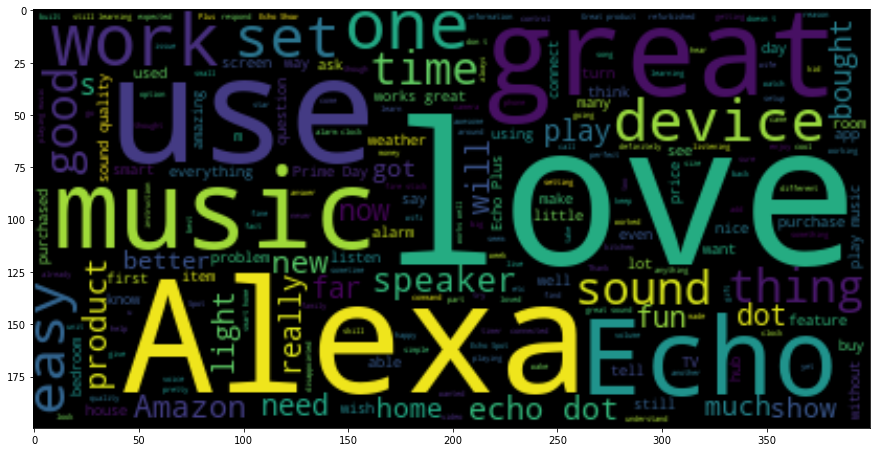

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(amazon_reviews_as_one_string)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')

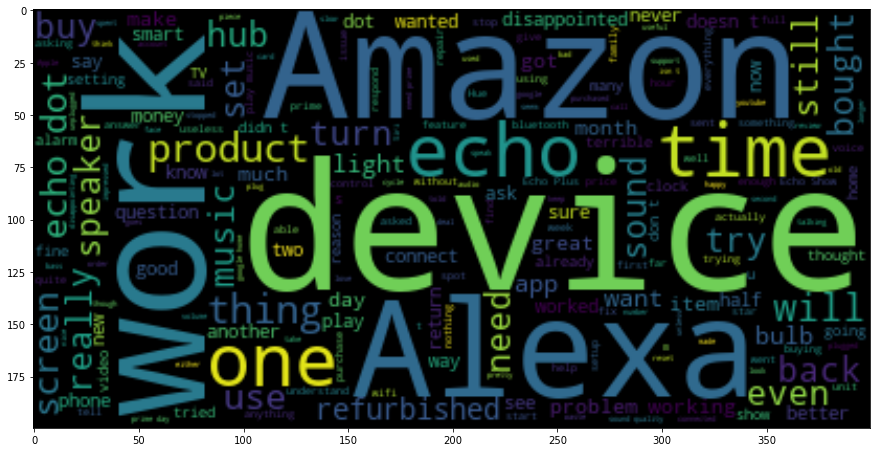

In [ ]:
#Negative reviews wordcloud

negative_amazon_reviews_list = negative['verified_reviews'].tolist()
negative_amazon_reviews_as_one_sentence = "".join(negative_amazon_reviews_list)
plt.figure(figsize = (15,15))
wordcloud = WordCloud().generate(negative_amazon_reviews_as_one_sentence)
plt.imshow(wordcloud, interpolation='bilinear')

# TASK #5: PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#Removing punctuation from all the reviews
amazon_reviews_punc_removed = [char for char in amazon_reviews_as_one_string if char not in string.punctuation]
amazon_reviews_punc_removed

['L',
 'o',
 'v',
 'e',
 ' ',
 'm',
 'y',
 ' ',
 'E',
 'c',
 'h',
 'o',
 'L',
 'o',
 'v',
 'e',
 'd',
 ' ',
 'i',
 't',
 'S',
 'o',
 'm',
 'e',
 't',
 'i',
 'm',
 'e',
 's',
 ' ',
 'w',
 'h',
 'i',
 'l',
 'e',
 ' ',
 'p',
 'l',
 'a',
 'y',
 'i',
 'n',
 'g',
 ' ',
 'a',
 ' ',
 'g',
 'a',
 'm',
 'e',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'c',
 'a',
 'n',
 ' ',
 'a',
 'n',
 's',
 'w',
 'e',
 'r',
 ' ',
 'a',
 ' ',
 'q',
 'u',
 'e',
 's',
 't',
 'i',
 'o',
 'n',
 ' ',
 'c',
 'o',
 'r',
 'r',
 'e',
 'c',
 't',
 'l',
 'y',
 ' ',
 'b',
 'u',
 't',
 ' ',
 'A',
 'l',
 'e',
 'x',
 'a',
 ' ',
 's',
 'a',
 'y',
 's',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'g',
 'o',
 't',
 ' ',
 'i',
 't',
 ' ',
 'w',
 'r',
 'o',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'a',
 'n',
 's',
 'w',
 'e',
 'r',
 's',
 ' ',
 't',
 'h',
 'e',
 ' ',
 's',
 'a',
 'm',
 'e',
 ' ',
 'a',
 's',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 ' ',
 'I',
 ' ',
 'l',
 'i',
 'k',
 'e',
 ' ',
 'b',
 'e',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'b',
 'l',
 'e',
 ' ',
 't'

In [ ]:
#Converting the list to string
amazon_reviews_punc_removed_string = "".join(amazon_reviews_punc_removed)
amazon_reviews_punc_removed_string

'Love my EchoLoved itSometimes while playing a game you can answer a question correctly but Alexa says you got it wrong and answers the same as you  I like being able to turn lights on and off while away from homeI have had a lot of fun with this thing My 4 yr old learns about dinosaurs i control the lights and play games like categories Has nice sound when playing music as wellMusicI received the echo as a gift I needed another Bluetooth or something to play music easily accessible and found this smart speaker Can’t wait to see what else it can doWithout having a cellphone I cannot use many of her features I have an iPad but do not see that of any use  It IS a great alarm  If u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep herIt is fun to ask random questions to hear her response  She does not seem to be very smartbon politics yetI think this is the 5th one Ive purchased Im working on getting one in every room of my ho

# TASK 6: PERFORM DATA CLEANING - REMOVE STOPWORDS

In [ ]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AVEEK\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
reviews_stopwords_removed = [word for word in amazon_reviews_punc_removed_string.split() if word.lower() not in stopwords.words('english')]
reviews_stopwords_removed

['Love',
 'EchoLoved',
 'itSometimes',
 'playing',
 'game',
 'answer',
 'question',
 'correctly',
 'Alexa',
 'says',
 'got',
 'wrong',
 'answers',
 'like',
 'able',
 'turn',
 'lights',
 'away',
 'homeI',
 'lot',
 'fun',
 'thing',
 '4',
 'yr',
 'old',
 'learns',
 'dinosaurs',
 'control',
 'lights',
 'play',
 'games',
 'like',
 'categories',
 'nice',
 'sound',
 'playing',
 'music',
 'wellMusicI',
 'received',
 'echo',
 'gift',
 'needed',
 'another',
 'Bluetooth',
 'something',
 'play',
 'music',
 'easily',
 'accessible',
 'found',
 'smart',
 'speaker',
 'Can’t',
 'wait',
 'see',
 'else',
 'doWithout',
 'cellphone',
 'cannot',
 'use',
 'many',
 'features',
 'iPad',
 'see',
 'use',
 'great',
 'alarm',
 'u',
 'r',
 'almost',
 'deaf',
 'hear',
 'alarm',
 'bedroom',
 'living',
 'room',
 'reason',
 'enough',
 'keep',
 'herIt',
 'fun',
 'ask',
 'random',
 'questions',
 'hear',
 'response',
 'seem',
 'smartbon',
 'politics',
 'yetI',
 'think',
 '5th',
 'one',
 'Ive',
 'purchased',
 'Im',
 'worki

In [ ]:
reviews_stopwords_removed_string = " ".join(reviews_stopwords_removed)
reviews_stopwords_removed_string

'Love EchoLoved itSometimes playing game answer question correctly Alexa says got wrong answers like able turn lights away homeI lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music wellMusicI received echo gift needed another Bluetooth something play music easily accessible found smart speaker Can’t wait see else doWithout cellphone cannot use many features iPad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep herIt fun ask random questions hear response seem smartbon politics yetI think 5th one Ive purchased Im working getting one every room house really like features offer specifily playing music Echos controlling lights throughout houselooks greatLove I’ve listened songs haven’t heard since childhood get news weather information It’s greatI sent 85 year old Dad talks constantlyI love Learning knew things eveyday Still figuring everything works far easy use understand make laugh timesI purchas

# TASK 7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [ ]:
reviews_stopwords_removed

['Love',
 'EchoLoved',
 'itSometimes',
 'playing',
 'game',
 'answer',
 'question',
 'correctly',
 'Alexa',
 'says',
 'got',
 'wrong',
 'answers',
 'like',
 'able',
 'turn',
 'lights',
 'away',
 'homeI',
 'lot',
 'fun',
 'thing',
 '4',
 'yr',
 'old',
 'learns',
 'dinosaurs',
 'control',
 'lights',
 'play',
 'games',
 'like',
 'categories',
 'nice',
 'sound',
 'playing',
 'music',
 'wellMusicI',
 'received',
 'echo',
 'gift',
 'needed',
 'another',
 'Bluetooth',
 'something',
 'play',
 'music',
 'easily',
 'accessible',
 'found',
 'smart',
 'speaker',
 'Can’t',
 'wait',
 'see',
 'else',
 'doWithout',
 'cellphone',
 'cannot',
 'use',
 'many',
 'features',
 'iPad',
 'see',
 'use',
 'great',
 'alarm',
 'u',
 'r',
 'almost',
 'deaf',
 'hear',
 'alarm',
 'bedroom',
 'living',
 'room',
 'reason',
 'enough',
 'keep',
 'herIt',
 'fun',
 'ask',
 'random',
 'questions',
 'hear',
 'response',
 'seem',
 'smartbon',
 'politics',
 'yetI',
 'think',
 '5th',
 'one',
 'Ive',
 'purchased',
 'Im',
 'worki

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
amazon_reviews = vectorizer.fit_transform(reviews_stopwords_removed)
print(vectorizer.get_feature_names())

['072318', '10', '100', '1000', '100its', '100never', '100x', '1010', '1030pm', '10love', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990', '1990s', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '2030', '20i', '229', '23', '2448', '247', '24ghz', '25this', '29', '299', '2999', '2nd', '2or', '2original', '2package', '30', '300', '30so', '334love', '34', '342nd', '3434', '34a34', '34alexa', '34alexa34', '34card34', '34certified', '34computer34', '34cycle', '34cycle34', '34dot34', '34drop', '34first', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34hub', '34i', '34im', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34philips', '34play', '34second', '34she34', '34show', '34skills34', '34smart', '34smart34', '34sorry', '34spying34', '34tell', '34the', '34thick34', '34things', '34this', '34thongs', '34trouble', '34try', '34turn', '34visual34', '34wake34me', '34warehouse34', 

In [ ]:
print(amazon_reviews.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
def review_cleaning(text):
    review_punc_removed = [char for char in text if char not in string.punctuation]
    review_punc_removed_string = "".join(review_punc_removed)
    review_stopwords_removed = [word for word in review_punc_removed_string.split() if word.lower() not in stopwords.words('english')]
    return review_stopwords_removed

In [ ]:
#Testing function review_cleaning
clean_reviews = amazon_df['verified_reviews'].apply(review_cleaning)
print(clean_reviews[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = review_cleaning, dtype = np.uint8)
amazon_countvectorizer = vectorizer.fit_transform(amazon_df['verified_reviews'])

In [ ]:
amazon_countvectorizer.shape

(3150, 5211)

In [ ]:
X = pd.DataFrame(amazon_countvectorizer.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = amazon_df['feedback']
y.shape

(3150,)

In [ ]:
#Implementing NB model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot:>

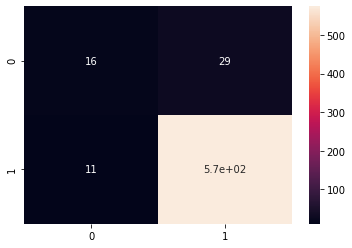

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.59      0.36      0.44        45
           1       0.95      0.98      0.97       585

    accuracy                           0.94       630
   macro avg       0.77      0.67      0.71       630
weighted avg       0.93      0.94      0.93       630



In [ ]:
#Accuracy for NB_model

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict_test))

0.9365079365079365


<AxesSubplot:>

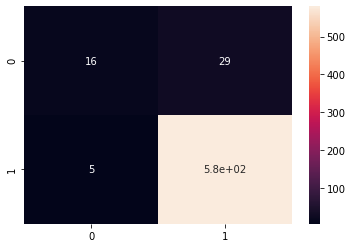

In [ ]:
#Building Logistic Regression model
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)

y_pred = LR_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.36      0.48        45
           1       0.95      0.99      0.97       585

    accuracy                           0.95       630
   macro avg       0.86      0.67      0.73       630
weighted avg       0.94      0.95      0.94       630



In [ ]:
#Accuracy for LR_model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


0.946031746031746


In [ ]:
#SVM model
from sklearn import svm

SVM_model = svm.SVC()
SVM_model.fit(X_train,y_train)

y_pred_SVM = SVM_model.predict(X_test)

<AxesSubplot:>

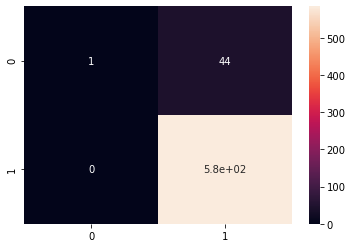

In [ ]:
cm = confusion_matrix(y_test, y_pred_SVM)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        45
           1       0.93      1.00      0.96       585

    accuracy                           0.93       630
   macro avg       0.97      0.51      0.50       630
weighted avg       0.94      0.93      0.90       630



In [ ]:
#Accuracy for SVM model
from sklearn.metrics import accuracy_score
print(f'Accuracy of SVM model: {accuracy_score(y_test, y_pred_SVM)}')

Accuracy of SVM model: 0.9301587301587302


In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(max_depth=2, random_state=0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

<AxesSubplot:>

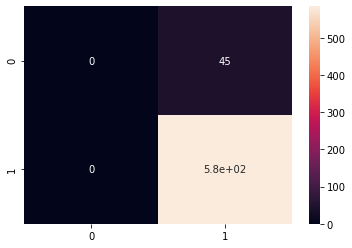

In [ ]:
y_pred_RF = RF_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.93      1.00      0.96       585

    accuracy                           0.93       630
   macro avg       0.46      0.50      0.48       630
weighted avg       0.86      0.93      0.89       630



C:\Users\AVEEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AVEEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AVEEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Accuracy for RFC model
from sklearn.metrics import accuracy_score
print(f'Accuracy of RFC model: {accuracy_score(y_test, y_pred_RF)}')

Accuracy of RFC model: 0.9285714285714286


### Accuracy of the logistic regression model is highest in the analysis of sentiments of amazon reviews = (94.6%) 